In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Implement the basic stereo algorithm of taking a window around every pixel in one image and 
search for the best match along the same scan line in the other image. You will do this both left to 
right and right to left.

a) Implement the SSD match algorithm, and create a disparity image D(x,y) such that L(x,y) = 
R(x+D(x,y),y) when matching from left to right. Also match from right to left.

In [2]:
L = cv2.imread("PS2-1-a-1.png", cv2.IMREAD_GRAYSCALE)
R = cv2.imread("PS2-1-a-2.png", cv2.IMREAD_GRAYSCALE)

In [3]:
def disparity(left_image, right_image, maxoffset, minoffset, window_size=5):
    k = int(window_size // 2)
    row, col = np.shape(left_image)
    DL = np.zeros((row, col))
    DR = np.zeros((row, col))

    for r in range(k, row - k):
        for c in range(k, col - k):
            windowleft = left_image[r - k:r + k + 1, c - k:c + k + 1]
            windowright = right_image[r - k:r + k + 1, c - k:c + k + 1]
            errorL = np.Inf
            errorR = np.Inf


            # Calculate disparities from left to right
            for e in range(np.max((k, c - maxoffset)), c+1-minoffset): 
                squareright = right_image[r - k:r + k + 1, e - k:e + k + 1]
                ErrL = np.sum((windowleft - squareright)**2)

                if ErrL < errorL:
                    errorL = ErrL
                    DL[r, c] = np.abs(c - e)

            # Calculate disparities from right to left
            for e in range(c+minoffset, np.min((col - k, c + maxoffset + 1))): 
                squareleft = left_image[r - k:r + k + 1, e - k:e + k + 1]
                ErrR = np.sum((windowright - squareleft)**2)

                if ErrR <= errorR:
                    errorR = ErrR
                    DR[r, c] = np.abs(c - e)

            # DL=np.round(DL/np.max(DL)*255)
            # DR=np.round(DR/np.max(DR)*255)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("DL: Left To Right")
    plt.imshow(DL, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("DR: Right to Left")
    plt.imshow(DR, cmap='gray')

    plt.show()

    return DL, DR



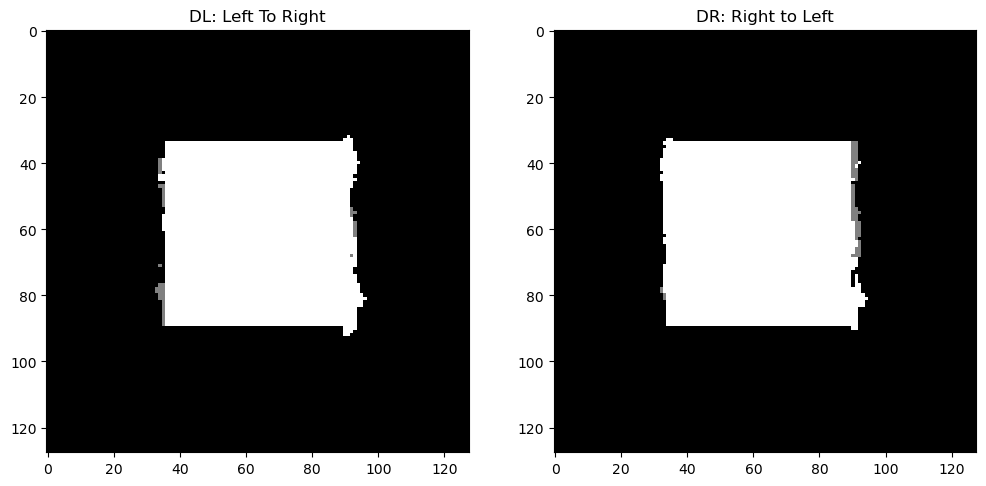

In [81]:
maxoffset=2
minoffset=0
[DL,DR]=disparity(L,R,maxoffset,minoffset, window_size=9)

2 Now we’re going to try this on a real image pair

a) Again apply your SSD match algorithm, and again create a disparity image D(x,y) such that 
L(x,y) = R(x+DL(x,y),y) when matching from left to right. Also match from right to left.

In [4]:
L2 = cv2.imread("PS2-2-a-1.png", cv2.IMREAD_GRAYSCALE)
R2 = cv2.imread("PS2-2-a-2.png", cv2.IMREAD_GRAYSCALE)


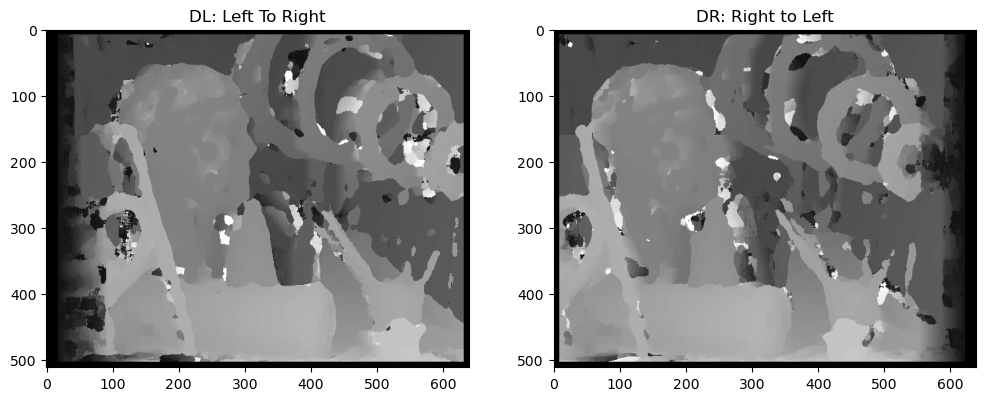

In [164]:
maxoffset=int(np.ceil(L2.shape[1]/5) // 2 * 2 + 1)
minoffset=10
[DL2,DR2]=disparity(L2,R2,maxoffset, minoffset, window_size=17)

b) Compare your results with the ground truth

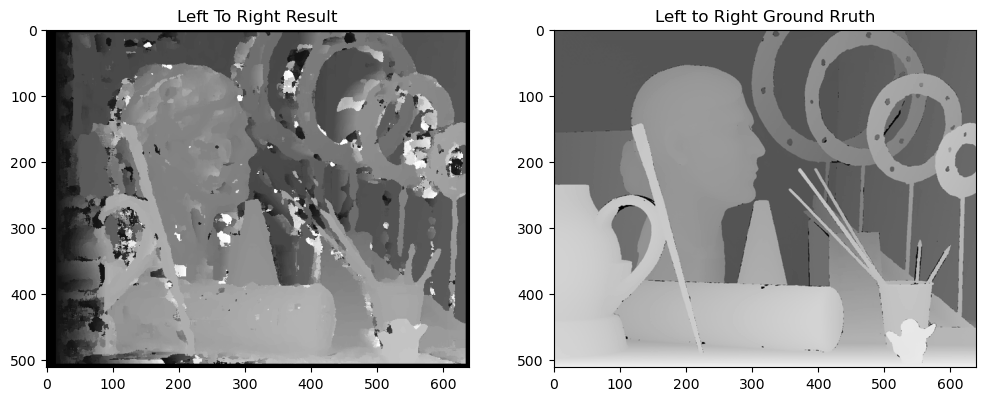

In [86]:
GtL = cv2.imread("PS2-2-b-1.png", cv2.IMREAD_GRAYSCALE)
GtR = cv2.imread("PS2-2-b-2.png", cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Left To Right Result")
plt.imshow(DL2, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Left to Right Ground Rruth")
plt.imshow(GtL, cmap='gray')

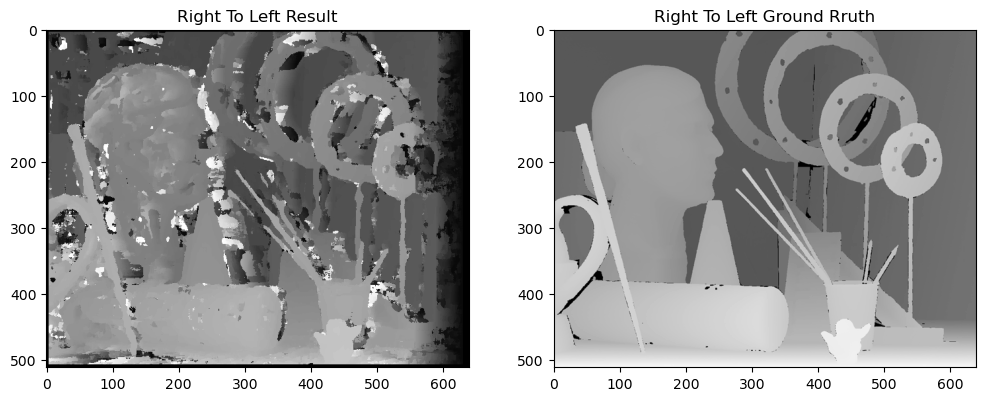

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Right To Left Result")
plt.imshow(DR2, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Right To Left Ground Rruth")
plt.imshow(GtR, cmap='gray')

3. SSD is not very robust to certain perturbations. We’re going to try to see the effect of perturbations

a) Add some Gaussian noise to the image; either one or both. Make the noise sigma big enough that you can tell some noise has been added. Run SSD again

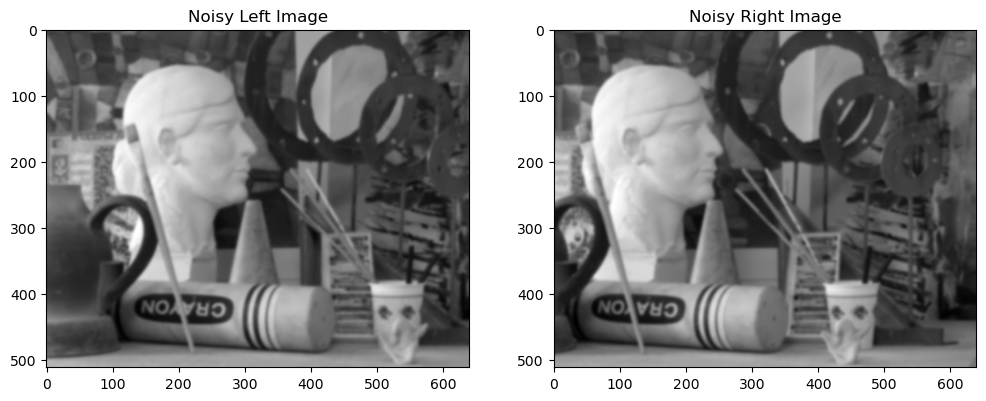

In [122]:
sigma = 2
noiseL = cv2.GaussianBlur(L2, (0, 0), sigma)
noiseR = cv2.GaussianBlur(R2, (0, 0), sigma)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Noisy Left Image")
plt.imshow(noiseL, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Noisy Right Image")
plt.imshow(noiseR, cmap='gray')
plt.show()


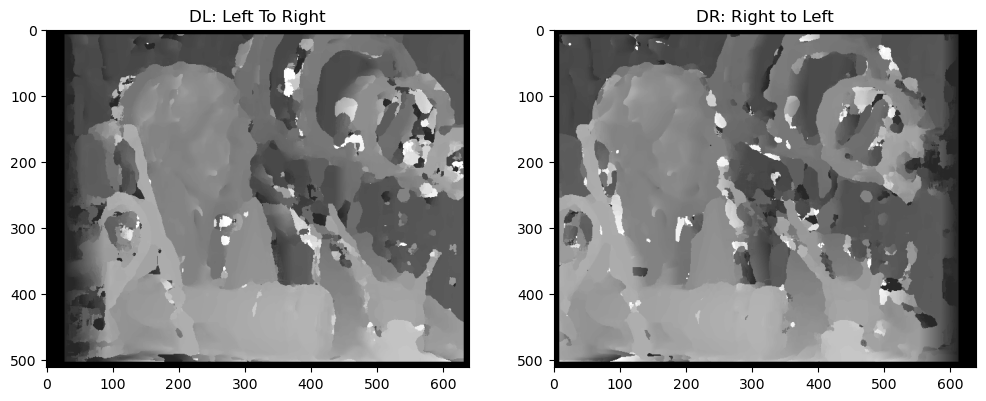

In [123]:
maxoffset=int(np.ceil(L2.shape[1]/5) // 2 * 2 + 1)
minoffset=20
[DL3a,DR3a]=disparity(noiseL,noiseR,maxoffset, minoffset, window_size=17)

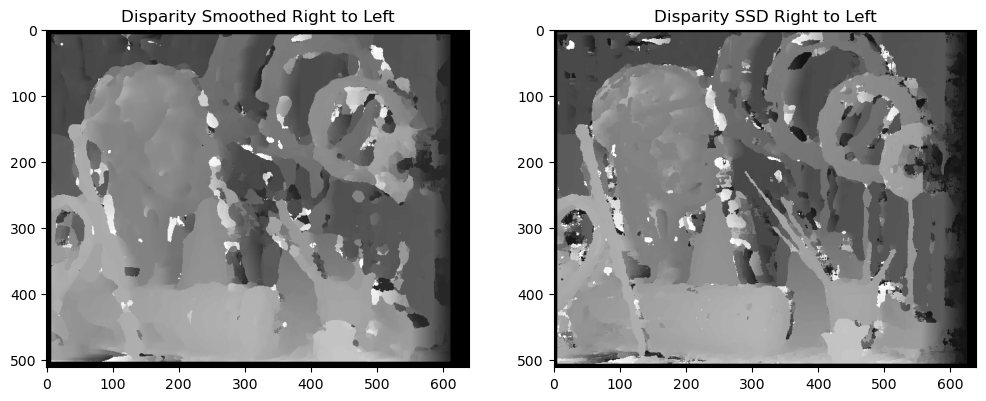

In [125]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Smoothed Right to Left")
plt.imshow(DR3a, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Disparity SSD Right to Left")
plt.imshow(DR2, cmap='gray')

plt.show()

Depending on the value of sigma you can get better or worse result. When using values of sigma high enough for the noise to have an effect, the Disparity Images do not show a well defined boundaries for the different objects in the image.

With sigma values like 2, the disparity image shows worse results than without noise. Analyzing both images, the one with noise has more issues to differenciate between pixels that are next to each other, but are different objects with not the same depth. It is less precise with the objects shape, as the little statue in the front right part of the image is hard to recognize.

b) Instead of the Gaussian noise, increase the contrast (multiplication) of one of the images by just 10%. Run SSD again

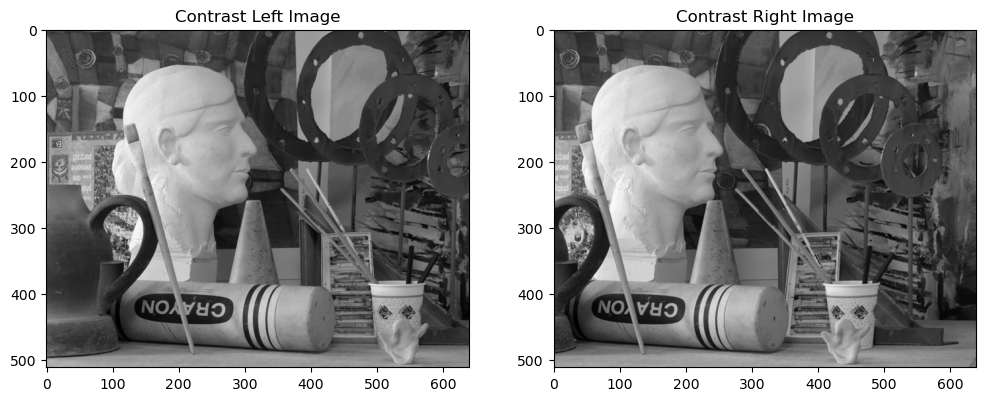

In [126]:
ContrastL2=L2*1.1
ContrastR2=R2*1.1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Contrast Left Image")
plt.imshow(ContrastL2, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Contrast Right Image")
plt.imshow(ContrastR2, cmap='gray')
plt.show()

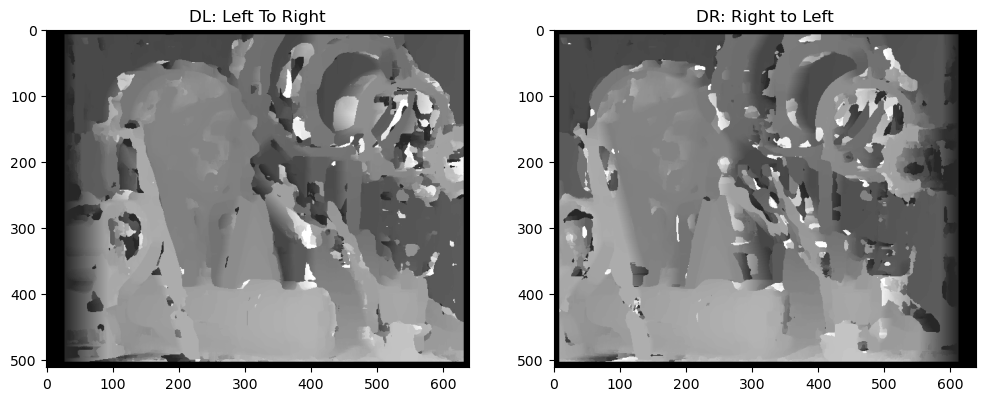

In [127]:
maxoffset=int(np.ceil(L2.shape[1]/5) // 2 * 2 + 1)
minoffset=20
[DL3b,DR3b]=disparity(ContrastL2,ContrastR2,maxoffset, minoffset, window_size=17)

With higher contrast we might get better results than with the blurry image, but still worse results than with the original image, using the same parameters.
It is really hard to different objects' shapes from the original image.
This can show that the SSD method does not behave well when there is noise and high contrast.

Normalized Correlation

a) Implement a window matching stereo algorithm using some form of normalized correlation

In [128]:
def disparity_norm(left_image, right_image, maxoffset, minoffset, window_size=5):
    k = int(window_size // 2)
    row, col = np.shape(left_image)
    DL = np.zeros((row, col))
    DR = np.zeros((row, col))

    for r in range(k, row - k):
        for c in range(k, col - k):
            windowleft = left_image[r - k:r + k + 1, c - k:c + k + 1]
            windowright = right_image[r - k:r + k + 1, c - k:c + k + 1]

            # Calculate disparities from left to right
            max_similarityL = -np.Inf
            for e in range(np.max((k, c - maxoffset)), c + 1 - minoffset):
                squareright = right_image[r - k:r + k + 1, e - k:e + k + 1]
                similarityL = cv2.matchTemplate(windowleft, squareright, cv2.TM_CCOEFF_NORMED)[0][0]

                if similarityL > max_similarityL:
                    max_similarityL = similarityL
                    DL[r, c] = np.abs(c - e)

            # Calculate disparities from right to left
            max_similarityR = -np.Inf
            for e in range(c + minoffset, np.min((col - k, c + maxoffset + 1))):
                squareleft = left_image[r - k:r + k + 1, e - k:e + k + 1]
                similarityR = cv2.matchTemplate(windowright, squareleft, cv2.TM_CCOEFF_NORMED)[0][0]

                if similarityR > max_similarityR:
                    max_similarityR = similarityR
                    DR[r, c] = np.abs(c - e)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("DL: Left To Right")
    plt.imshow(DL, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("DR: Right to Left")
    plt.imshow(DR, cmap='gray')

    plt.show()

    return DL, DR



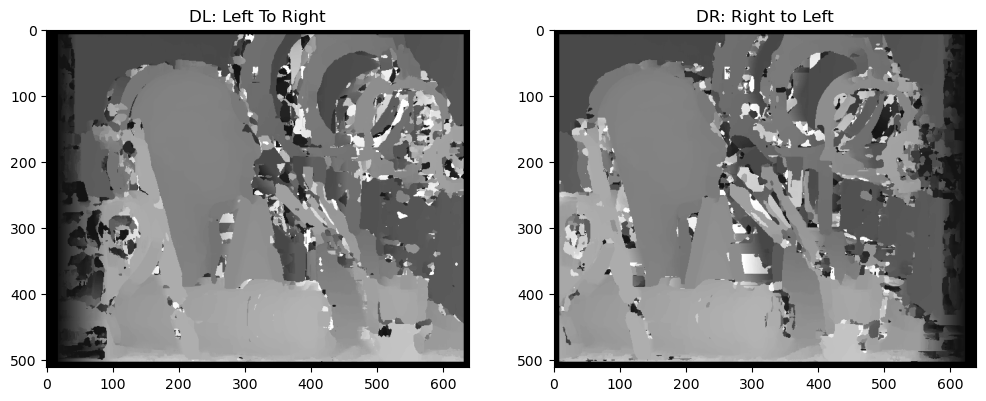

In [129]:
maxoffset=int(np.ceil(L2.shape[1]/5) // 2 * 2 + 1)
minoffset=10
[DL4,DR4]=disparity_norm(L2,R2,maxoffset, minoffset, window_size=17)

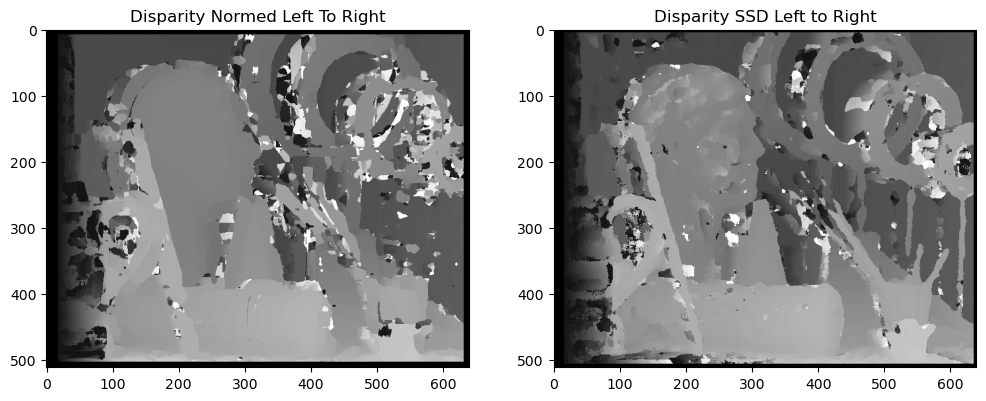

In [130]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Normed Left To Right")
plt.imshow(DL4, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Disparity SSD Left to Right")
plt.imshow(DL2, cmap='gray')

plt.show()

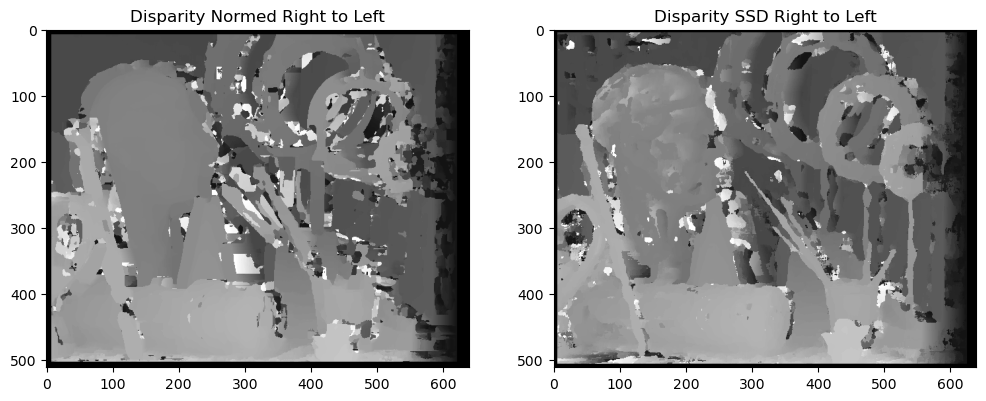

In [131]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Normed Right to Left")
plt.imshow(DR4, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Disparity SSD Right to Left")
plt.imshow(DR2, cmap='gray')

plt.show()

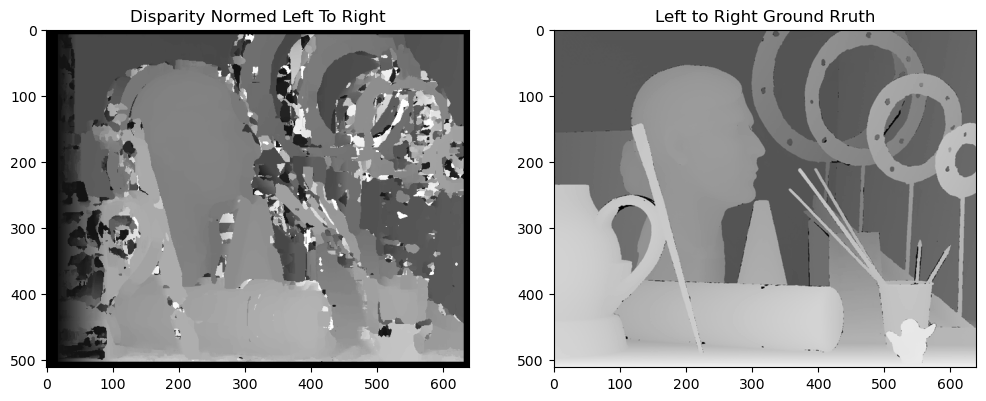

In [132]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Normed Left To Right")
plt.imshow(DL4, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Left to Right Ground Rruth")
plt.imshow(GtL, cmap='gray')

plt.show()

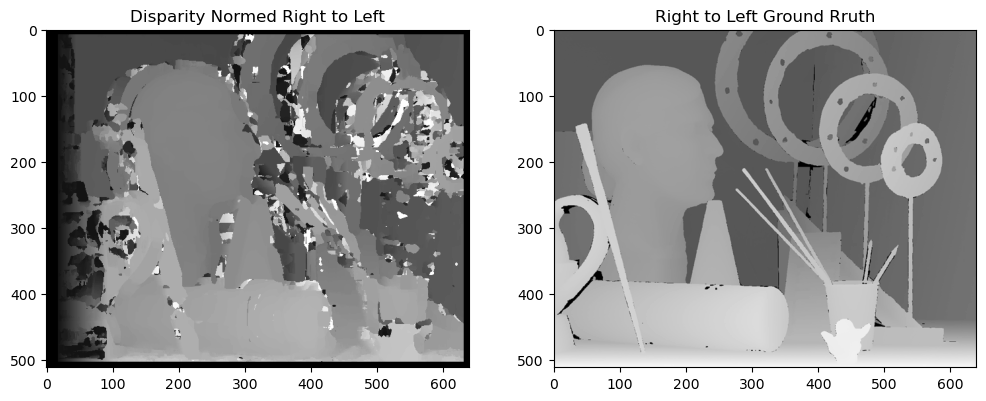

In [133]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Normed Right to Left")
plt.imshow(DL4, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Right to Left Ground Rruth")
plt.imshow(GtR, cmap='gray')

plt.show()

Analyzing both images compared to the SSD and Ground Truth images, it looks like the normalized disparity method making use of the CV_TM_CCOEFF_NORMED method from open CV has a simillar performance than the SSD method, using the same parameters. It looks more uniform, for example the statue looks more than the one in the ground truth image; but also shows worse the objects' borders and shapes. 

b) Now test it on both the Gaussian noise and contrast boosted versions from 2a and 2b.


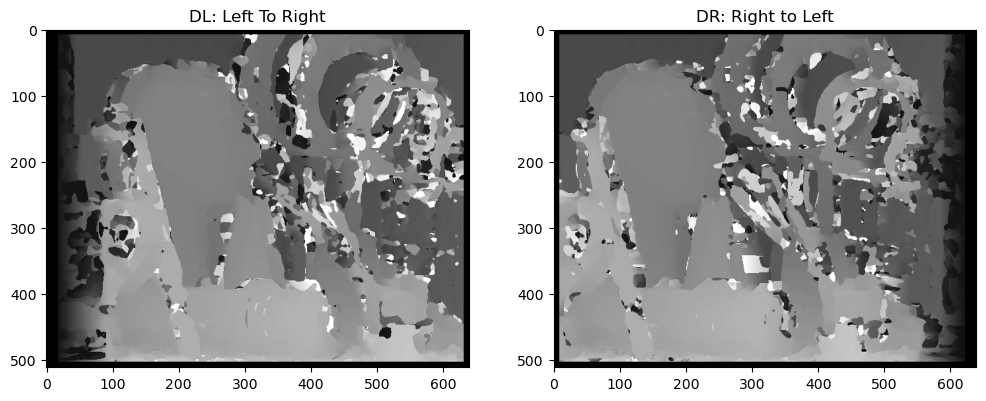

In [134]:
maxoffset=int(np.ceil(L2.shape[1]/5) // 2 * 2 + 1)
minoffset=10
[DL4b,DR4b]=disparity_norm(noiseL,noiseR,maxoffset, minoffset, window_size=17)

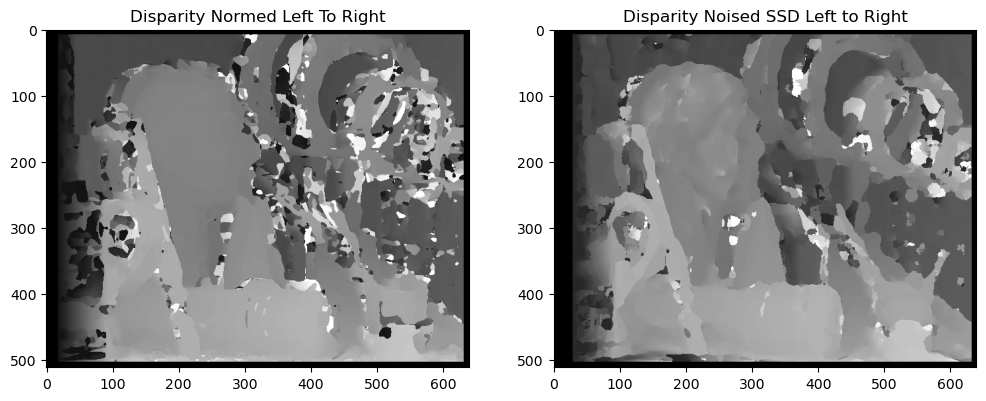

In [135]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Noised Normed Left To Right")
plt.imshow(DL4b, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Disparity Noised SSD Left to Right")
plt.imshow(DL3a, cmap='gray')

plt.show()

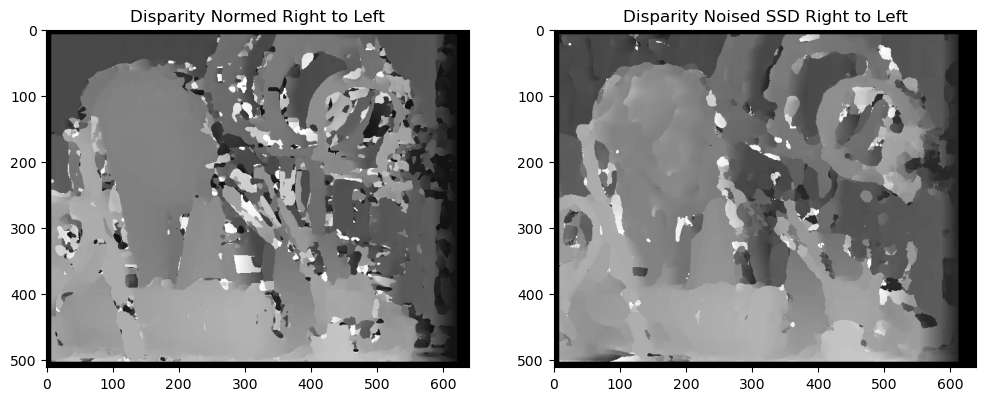

In [136]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Noised Normed Right to Left")
plt.imshow(DR4b, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Disparity Noised SSD Right to Left")
plt.imshow(DR3a, cmap='gray')

plt.show()

In [160]:
intCL2=(np.rint(ContrastL2)).astype("uint8")
intCR2=(np.rint(ContrastR2)).astype("uint8")


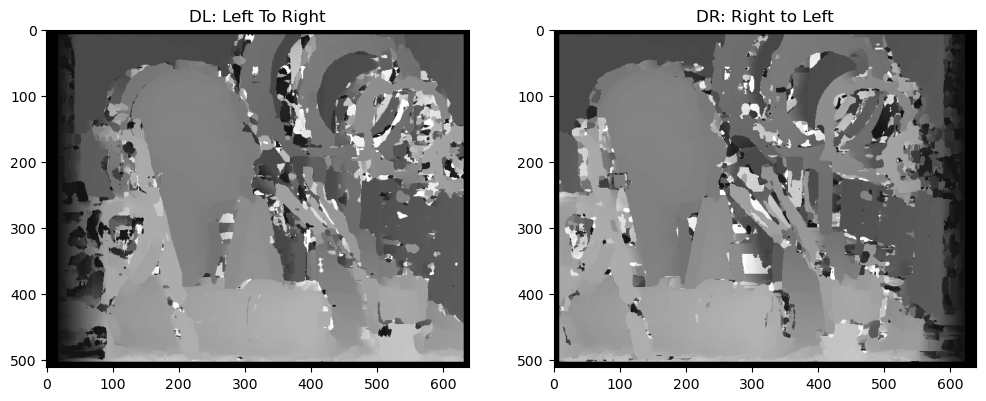

In [161]:
maxoffset=int(np.ceil(L2.shape[1]/5) // 2 * 2 + 1)
minoffset=10
[DL4b2,DR4b2]=disparity_norm(intCL2,intCR2,maxoffset, minoffset, window_size=17)

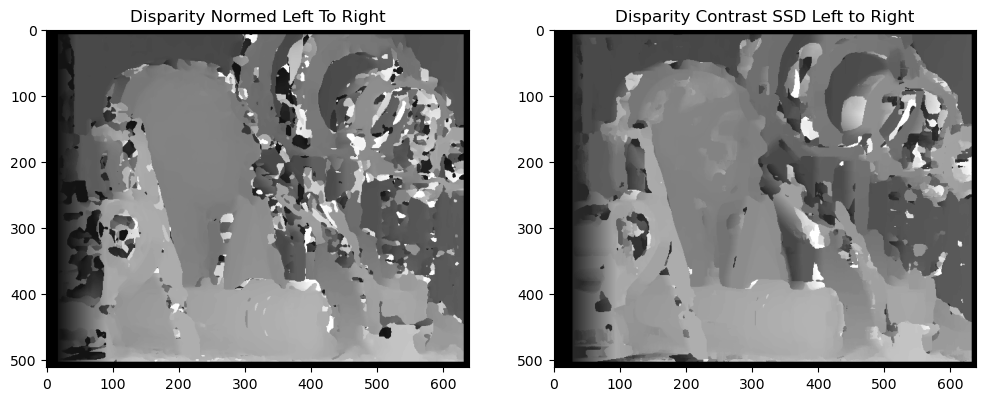

In [162]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Contrast Normed Left To Right")
plt.imshow(DL4b, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Disparity Contrast SSD Left to Right")
plt.imshow(DL3b, cmap='gray')

plt.show()

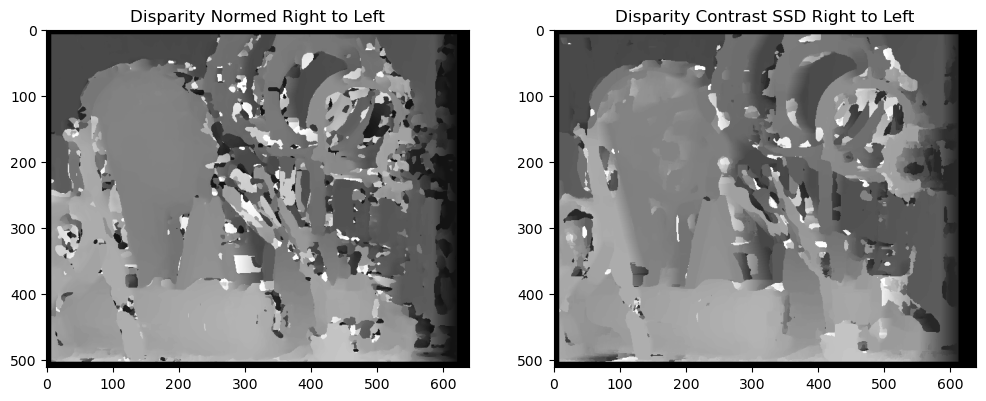

In [163]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Disparity Normed Right to Left")
plt.imshow(DR4b, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Disparity Contrast SSD Right to Left")
plt.imshow(DR3b, cmap='gray')

plt.show()

Again, the normalized method and the SSD show simillar results, each of them has its pros and cons. The normalized one shows better results in terms of uniformity, as can be appreciated in the statue. However, the SSD one shows better the objects' shapes and edges, with less white pixels among them.

5. New pair of images.

a) Try your algorithms on this pair. Play with the images – smooth, sharpen, etc. Keep 
comparing to the ground truth.


In [138]:
L5 = cv2.imread("PS2-5-a-1.png", cv2.IMREAD_GRAYSCALE)
R5 = cv2.imread("PS2-5-a-2.png", cv2.IMREAD_GRAYSCALE)

In [139]:
GtL5 = cv2.imread("PS2-5-a-3.png", cv2.IMREAD_GRAYSCALE)
GtR5 = cv2.imread("PS2-5-a-4.png", cv2.IMREAD_GRAYSCALE)

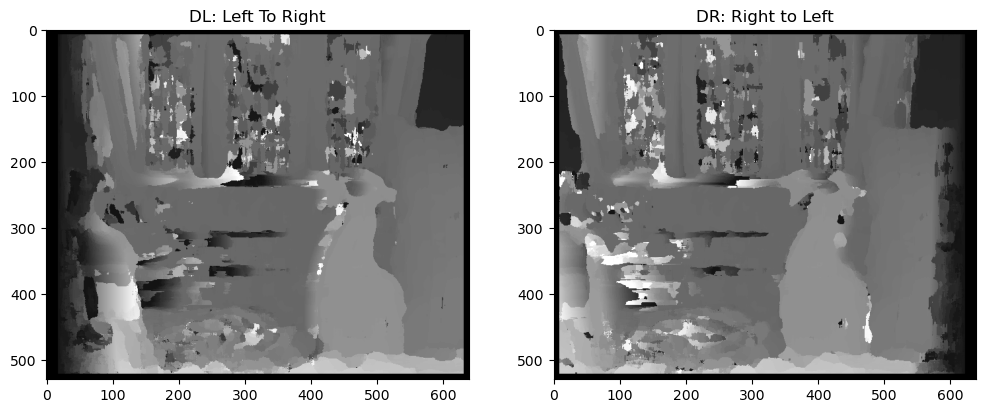

In [140]:
maxoffset=int(np.ceil(L5.shape[1]/5) // 2 * 2 + 1)
minoffset=10
[DL51,DR51]=disparity(L5,R5,maxoffset, minoffset, window_size=17)

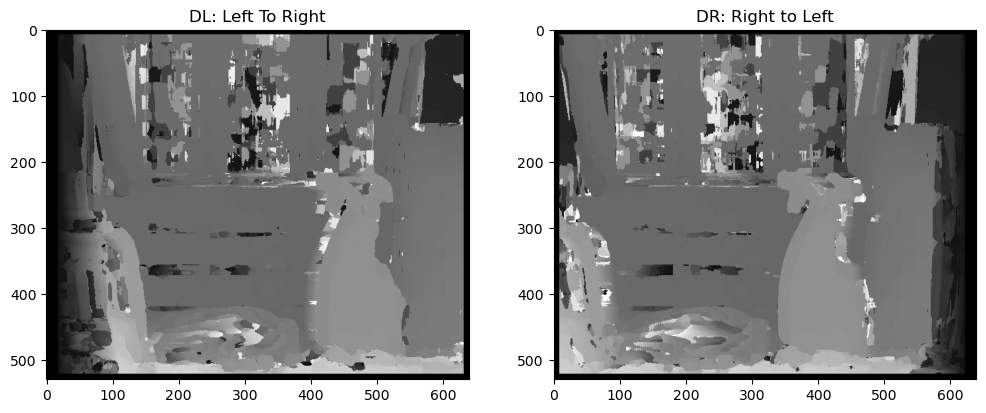

In [141]:
maxoffset=int(np.ceil(L5.shape[1]/5) // 2 * 2 + 1)
minoffset=10
[DL52,DR52]=disparity_norm(L5,R5,maxoffset, minoffset, window_size=17)

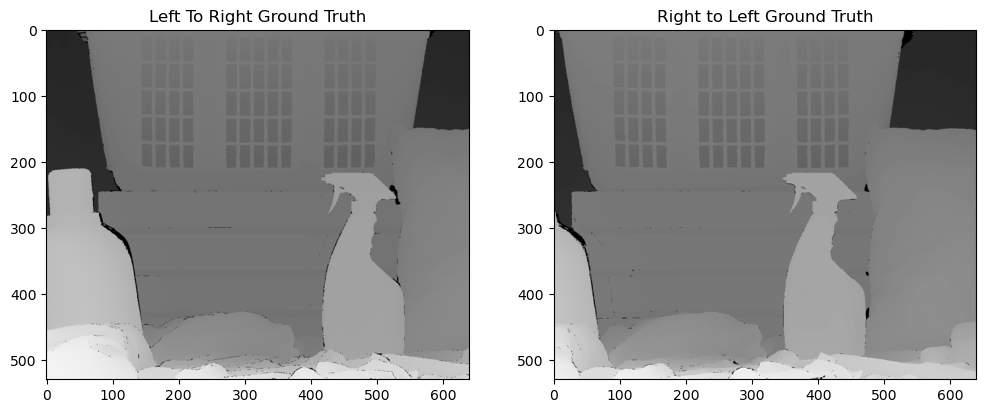

In [142]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Left To Right Ground Truth")
plt.imshow(GtL5, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Right to Left Ground Truth")
plt.imshow(GtR5, cmap='gray')

After comparing the normalized and SDD methods in this two images, using different parameters of window's size and offset range, it is hard to conclude which one works better. They both struggle in detecting the background thin lines. However, the normalized can work slightly better with more complex images like this, as it shows a more uniform output